### **Loading the data and libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
sixcrypto = pd.read_csv(r"C:\Users\sahmed\Desktop\Shahzad\DS\CIND 820\Shahzad/sixcrypto.csv") 
df=pd.DataFrame(sixcrypto)

## **Time-Series Forecasting-Simple Moving Average(SMA)**

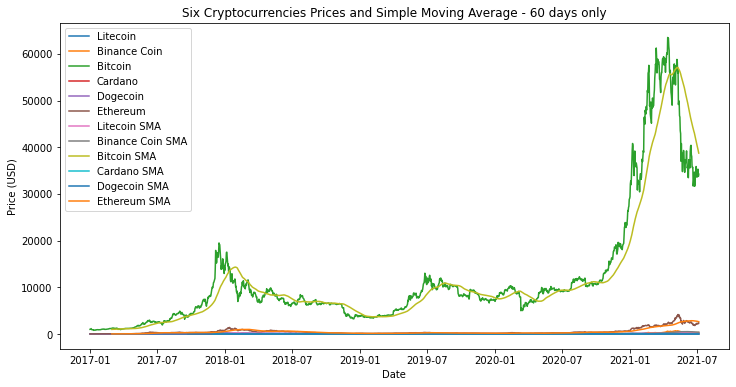

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Calculate the 30-day Simple Moving Average (SMA) for each currency
sma_litecoin = df_litecoin['Close'].rolling(window=60).mean()
sma_binance = df_binance['Close'].rolling(window=60).mean()
sma_bitcoin = df_bitcoin['Close'].rolling(window=60).mean()
sma_cardano = df_cardano['Close'].rolling(window=60).mean()
sma_dogecoin = df_dogecoin['Close'].rolling(window=60).mean()
sma_ethereum = df_ethereum['Close'].rolling(window=60).mean()

# Plot the time series data and the SMA for each currency in one figure
plt.figure(figsize=(12, 6))
plt.plot(df_litecoin['Close'], label='Litecoin')
plt.plot(df_binance['Close'], label='Binance Coin')
plt.plot(df_bitcoin['Close'], label='Bitcoin')
plt.plot(df_cardano['Close'], label='Cardano')
plt.plot(df_dogecoin['Close'], label='Dogecoin')
plt.plot(df_ethereum['Close'], label='Ethereum')
plt.plot(sma_litecoin, label='Litecoin SMA')
plt.plot(sma_binance, label='Binance Coin SMA')
plt.plot(sma_bitcoin, label='Bitcoin SMA')
plt.plot(sma_cardano, label='Cardano SMA')
plt.plot(sma_dogecoin, label='Dogecoin SMA')
plt.plot(sma_ethereum, label='Ethereum SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Six Cryptocurrencies Prices and Simple Moving Average - 60 days only')
plt.legend()
plt.show()

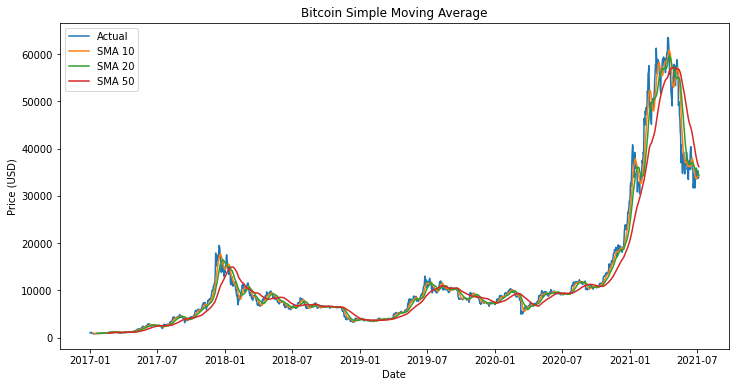

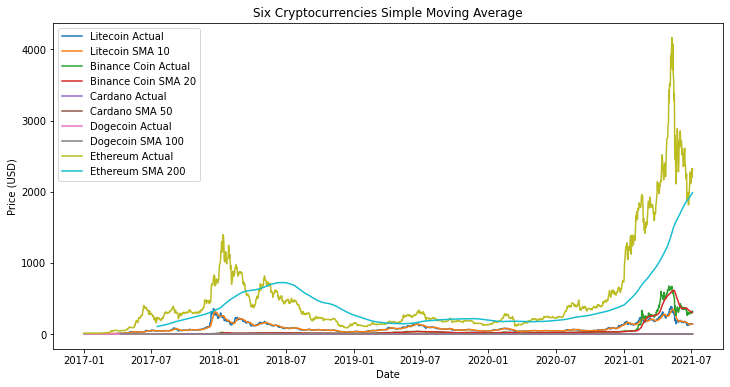

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a custom date parser function
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%y')

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma

# Calculate Simple Moving Averages for Bitcoin
sma_10 = calculate_sma(df_bitcoin['Close'], 10)
sma_20 = calculate_sma(df_bitcoin['Close'], 20)
sma_50 = calculate_sma(df_bitcoin['Close'], 50)

# Plot the Simple Moving Averages and Actual Prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin['Close'], label='Actual')
plt.plot(sma_10, label='SMA 10')
plt.plot(sma_20, label='SMA 20')
plt.plot(sma_50, label='SMA 50')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Simple Moving Average')
plt.legend()
plt.show()

# Calculate Simple Moving Averages for other cryptocurrencies
sma_10 = calculate_sma(df_litecoin['Close'], 10)
sma_20 = calculate_sma(df_binance['Close'], 20)
sma_50 = calculate_sma(df_cardano['Close'], 50)
sma_100 = calculate_sma(df_dogecoin['Close'], 100)
sma_200 = calculate_sma(df_ethereum['Close'], 200)

# Plot the Simple Moving Averages and Actual Prices for other cryptocurrencies
plt.figure(figsize=(12, 6))
plt.plot(df_litecoin['Close'], label='Litecoin Actual')
plt.plot(sma_10, label='Litecoin SMA 10')
plt.plot(df_binance['Close'], label='Binance Coin Actual')
plt.plot(sma_20, label='Binance Coin SMA 20')
plt.plot(df_cardano['Close'], label='Cardano Actual')
plt.plot(sma_50, label='Cardano SMA 50')
plt.plot(df_dogecoin['Close'], label='Dogecoin Actual')
plt.plot(sma_100, label='Dogecoin SMA 100')
plt.plot(df_ethereum['Close'], label='Ethereum Actual')
plt.plot(sma_200, label='Ethereum SMA 200')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Six Cryptocurrencies Simple Moving Average')
plt.legend()
plt.show()


### **Evaluation of SMA Model**

In [70]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('sixcrypto.csv')

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma

# Define a dictionary to store the results for each currency
results_30 = {}
results_60 = {}

# Calculate Simple Moving Averages and errors for each currency for both 30 and 60 day periods
for symbol in df['Symbol'].unique():
    df_curr = df[df['Symbol'] == symbol]
    sma_30 = calculate_sma(df_curr['Close'], 30)
    mse_30 = np.mean((sma_30 - df_curr['Close']) ** 2)
    mae_30 = np.mean(abs(sma_30 - df_curr['Close']))
    rmse_30 = np.sqrt(mse_30)
    results_30[symbol] = {'MSE': mse_30, 'MAE': mae_30, 'RMSE': rmse_30}
    
    sma_60 = calculate_sma(df_curr['Close'], 60)
    mse_60 = np.mean((sma_60 - df_curr['Close']) ** 2)
    mae_60 = np.mean(abs(sma_60 - df_curr['Close']))
    rmse_60 = np.sqrt(mse_60)
    results_60[symbol] = {'MSE': mse_60, 'MAE': mae_60, 'RMSE': rmse_60}

# Print out the results in a tabular format
print("{:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Currency', 'MSE (30 day)', 'MAE (30 day)', 'RMSE (30 day)', 'MSE (60 day)', 'MAE (60 day)', 'RMSE (60 day)'))
for symbol in results_30:
    print("{:<15} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f}".format(symbol, results_30[symbol]['MSE'], results_30[symbol]['MAE'], results_30[symbol]['RMSE'], results_60[symbol]['MSE'], results_60[symbol]['MAE'], results_60[symbol]['RMSE']))


Currency        MSE (30 day)    MAE (30 day)    RMSE (30 day)   MSE (60 day)    MAE (60 day)    RMSE (60 day)  
LTC             651.0176065067  13.8417116565   25.5150466687   1190.2500117420 20.3998952670   34.5000001702  
ADA             0.0113313243    0.0481830373    0.1064486931    0.0243255183    0.0764471746    0.1559664011   
BNB             1182.7233587541 10.6214267300   34.3907452486   2564.4545633058 18.1319001012   50.6404439485  
DOGE            0.0010242335    0.0068243710    0.0320036485    0.0019923583    0.0097895620    0.0446358413   
ETH             26358.9960465244 79.7710654671   162.3545381150  52886.9139518670 118.1584317936  229.9715503097 
BTC             6461706.4679676499 1320.5815027141 2541.9886836821 16064760.4267840981 2191.2381493156 4008.0868786472


### **Feature imporatance of SMA Model**

In [65]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Create a dictionary to store feature importance results
feature_importance = {"High": {}, "Low": {}, "Open": {}, "Volume": {}, "Marketcap": {}}

# Loop through each cryptocurrency
for symbol in df["Symbol"].unique():
    # Subset data for the current cryptocurrency
    subset = df[df["Symbol"] == symbol].reset_index(drop=True)
    
    # Split data into train and test sets
    train_size = int(len(subset) * 0.8)
    train_data = subset[:train_size]
    test_data = subset[train_size:]
    
    # Calculate Simple Moving Average (SMA)
    window_size = 5
    train_data["SMA"] = train_data["Close"].rolling(window_size).mean()
    test_data["SMA"] = test_data["Close"].rolling(window_size).mean()
    
    # Fit ARIMA model to SMA data
    arima_model = ARIMA(train_data["SMA"].dropna(), order=(1, 1, 1))
    arima_results = arima_model.fit()
    
    # Get residuals from ARIMA model
    residuals = arima_results.resid
    
    # Train random forest and gradient boosting models on residuals
    rf_model = RandomForestRegressor()
    gb_model = GradientBoostingRegressor()
    rf_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]][window_size-1:], residuals)
    gb_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]][window_size-1:], residuals)
    
    # Store feature importance results for the current cryptocurrency
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], rf_model.feature_importances_):
        feature_importance[feature][symbol+"_RF"] = importance
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], gb_model.feature_importances_):
        feature_importance[feature][symbol+"_GB"] = importance

# Convert feature importance dictionary to dataframe
feature_importance_df = pd.DataFrame(feature_importance)

# Print feature importance results
print(feature_importance_df)

             High       Low      Open    Volume  Marketcap
LTC_RF   0.213019  0.160714  0.251786  0.169378   0.205103
LTC_GB   0.202787  0.178464  0.225911  0.179077   0.213761
ADA_RF   0.153102  0.141154  0.283473  0.183723   0.238549
ADA_GB   0.150157  0.098669  0.259200  0.176826   0.315148
BNB_RF   0.145342  0.176362  0.228490  0.241023   0.208783
BNB_GB   0.182459  0.206643  0.239367  0.208384   0.163147
DOGE_RF  0.190850  0.161078  0.276763  0.138397   0.232913
DOGE_GB  0.203673  0.090433  0.329928  0.104302   0.271664
ETH_RF   0.153971  0.178212  0.286029  0.153605   0.228182
ETH_GB   0.095889  0.217425  0.274577  0.146578   0.265531
BTC_RF   0.156253  0.165902  0.278549  0.165830   0.233466
BTC_GB   0.097728  0.188289  0.297953  0.142099   0.273932


### **Corrlation cofficient for SMA model**

In [74]:
import pandas as pd
import numpy as np

# Load the dataset
df1 = pd.read_csv('sixcrypto.csv')

# Define window size for SMA
window_size = 60

# Create a dictionary to store correlation coefficients for each currency
corr_dict = {}

# Iterate over each currency in the dataset
for currency in df1['Symbol'].unique():
    
    # Select rows for the current currency
    curr_df = df1[df1['Symbol'] == currency].copy()
    
    # Calculate the SMA with window size of 60 days
    curr_df['SMA'] = curr_df['Close'].rolling(window_size).mean()

    # Generate predicted prices using SMA
    curr_df['Predicted'] = curr_df['SMA'].shift(1)

    # Drop the first row, since it has NaN values
    curr_df = curr_df.dropna()

    # Calculate the correlation between the predicted and actual prices
    corr = np.corrcoef(curr_df['Close'], curr_df['Predicted'])[0,1]
    
    # Store the correlation coefficient for the current currency in the dictionary
    corr_dict[currency] = corr

# Create a dataframe from the dictionary of correlation coefficients
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Correlation Coefficient'])

# Sort the dataframe by correlation coefficient in descending order
corr_df = corr_df.sort_values(by='Correlation Coefficient', ascending=False)

# Print the dataframe
print(corr_df)

      Correlation Coefficient
BTC                  0.951533
ETH                  0.935910
ADA                  0.929577
BNB                  0.899203
LTC                  0.848562
DOGE                 0.830772


### **Exponential Smoothing (ES)** 

                        MSE         MAE      MAPE  Correlation Coefficient
Currency                                                                  
Litecoin          66.108048    3.873250  4.043157                 0.992513
Cardano            0.001610    0.014673  4.707509                 0.995194
Binance Coin     115.148700    2.896497  4.564376                 0.995667
Dogecoin           0.000139    0.002135  4.407408                 0.988990
Ethereum        3040.757465   22.106110  3.820580                 0.996338
Bitcoin       624621.840578  366.584262  2.868497                 0.998195


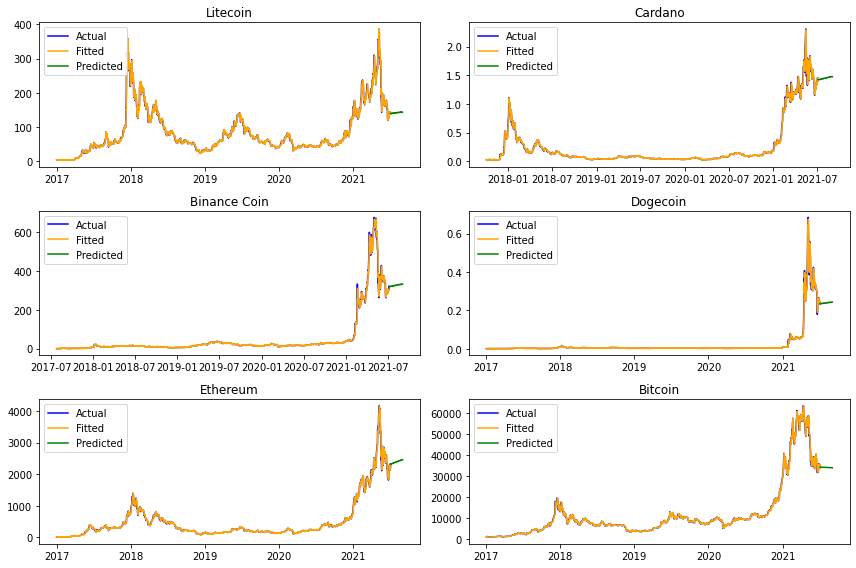

In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings

# Load data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'])

# Create a copy of the DataFrame
df_copy = df.copy()

# Set the index of the copied DataFrame to a DatetimeIndex with daily frequency
df_copy.set_index('Date', inplace=True)
df_copy.index = pd.DatetimeIndex(df_copy.index)

# Convert DatetimeIndex to PeriodIndex with daily frequency
df_copy.index = pd.PeriodIndex(df_copy.index, freq='D')

# Define function to calculate ES model
def calc_es_model(data):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        model = ExponentialSmoothing(data)
        fit = model.fit()
    mse = ((fit.resid ** 2).sum()) / len(fit.resid)
    mae = fit.resid.abs().sum() / len(fit.resid)
    mape = ((fit.resid.abs() / data) * 100).sum() / len(fit.resid)
    corr_coef = np.corrcoef(data, fit.fittedvalues)[0][1]
    return {'MSE': mse, 'MAE': mae, 'MAPE': mape, 'Correlation Coefficient': corr_coef}

# Calculate ES model for each currency
results = {}
for currency in df_copy['Name'].unique():
    currency_data = df_copy.loc[df_copy['Name'] == currency]['Close']
    results[currency] = calc_es_model(currency_data)

# Display results in table
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Currency'
print(results_df)

# Apply SE model to each currency's time series data
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

for i, currency in enumerate(df_copy['Name'].unique()):
    currency_data = df_copy.loc[df_copy['Name'] == currency]['Close']
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        se_model = ExponentialSmoothing(currency_data, seasonal_periods=12, trend='add', seasonal='add').fit()
        pred = se_model.forecast(steps=60) # predict next 60 days
    axs[i].plot(currency_data.index.to_timestamp(), currency_data, label='Actual', color='blue')
    axs[i].plot(currency_data.index.to_timestamp(), se_model.fittedvalues, label='Fitted', color='orange')
    axs[i].plot(pd.date_range(currency_data.index[-1].to_timestamp(), periods=60, freq='D'), pred, label='Predicted', color='green')
    corr_coef = np.corrcoef(currency_data, se_model.fittedvalues)[0][1]
    axs[i].set_title(currency)
    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [64]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Create a dictionary to store feature importance results
feature_importance = {"High": {}, "Low": {}, "Open": {}, "Volume": {}, "Marketcap": {}}

# Loop through each cryptocurrency
for symbol in df["Symbol"].unique():
    # Subset data for the current cryptocurrency
    subset = df[df["Symbol"] == symbol].reset_index(drop=True)
    
    # Split data into train and test sets
    train_size = int(len(subset) * 0.8)
    train_data = subset[:train_size]
    test_data = subset[train_size:]
    
    # Fit Exponential Smoothing model to train data
    es_model = ExponentialSmoothing(train_data["Close"])
    es_results = es_model.fit()
    
    # Get residuals from Exponential Smoothing model
    residuals = es_results.resid
    
    # Train random forest and gradient boosting models on residuals
    rf_model = RandomForestRegressor()
    gb_model = GradientBoostingRegressor()
    rf_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    gb_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    
    # Store feature importance results for the current cryptocurrency
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], rf_model.feature_importances_):
        feature_importance[feature][symbol+"_RF"] = importance
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], gb_model.feature_importances_):
        feature_importance[feature][symbol+"_GB"] = importance

# Convert feature importance dictionary to dataframe
feature_importance_df = pd.DataFrame(feature_importance)

# Print feature importance results
print(feature_importance_df)

             High       Low      Open    Volume  Marketcap
LTC_RF   0.190083  0.148736  0.295293  0.162702   0.203186
LTC_GB   0.230184  0.102110  0.245671  0.176966   0.245069
ADA_RF   0.237344  0.109264  0.272975  0.099091   0.281326
ADA_GB   0.265727  0.060978  0.258254  0.079738   0.335303
BNB_RF   0.147280  0.162572  0.240704  0.248039   0.201405
BNB_GB   0.183823  0.159226  0.319757  0.166098   0.171096
DOGE_RF  0.157217  0.114868  0.351135  0.131394   0.245385
DOGE_GB  0.086408  0.071156  0.525549  0.085705   0.231183
ETH_RF   0.132088  0.139073  0.338263  0.106493   0.284084
ETH_GB   0.090549  0.095060  0.348780  0.073895   0.391716
BTC_RF   0.137232  0.142753  0.337722  0.105168   0.277124
BTC_GB   0.126593  0.144757  0.376928  0.049882   0.301840


### **Time-Series Forecasting- ARIMA**

In [8]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load the data from a CSV file
df_Arima = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = df_Arima[df_Arima['Symbol'] == symbol].copy()
    
    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)
    
    # Fit a SARIMAX model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), trend='c')
    results = model.fit()
    
    # Add the model to the dictionary
    models[symbol] = results

# Print the summary output for all models
for symbol, result in models.items():
    print(f"Summary for {symbol}:")
    print(result.summary())
    print("="*60)

Summary for LTC:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1648
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5786.431
Date:                Tue, 14 Mar 2023   AIC                          11580.862
Time:                        12:19:58   BIC                          11602.489
Sample:                    01-01-2017   HQIC                         11588.881
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1440      0.381      0.378      0.705      -0.602       0.891
ar.L1         -0.7702      0.068    -11.398      0.000      -0.903      -0.638
ma.L1          0.7306      0.071   

In [9]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = data[data['Symbol'] == symbol]
    
    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)
    
    # Fit a SARIMAX model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), trend='c')
    results = model.fit()
    
    # Add the model to the dictionary
    models[symbol] = results

# Create an empty DataFrame for the report
report = pd.DataFrame(columns=['Cryptocurrency', 'ARIMA Model', 'Log-likelihood', 'AIC Value', 'Significant Coefficients', 'Correlation Coefficient', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error'])

# Loop through the models and populate the report DataFrame
for symbol, result in models.items():
    ar_coef = result.params['ar.L1']
    ma_coef = result.params['ma.L1']
    if abs(ar_coef) > 0.1 or abs(ma_coef) > 0.1:
        sig_coeffs = 'AR and MA'
    else:
        sig_coeffs = 'None'
    
    # Get the actual and predicted values
    actual = result.resid + result.fittedvalues
    predicted = result.predict(start=1, end=len(actual))
    
    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(actual, predicted)[0,1]
    
    # Calculate the mean absolute error
    mae = np.mean(np.abs(actual - predicted))
    
    # Calculate the mean squared error
    mse = np.mean((actual - predicted)**2)
    
    # Calculate the root mean squared error
    rmse = np.sqrt(mse)
    
    # Calculate the mean absolute percentage error
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    report = report.append({
        'Cryptocurrency': symbol,
        'ARIMA Model': 'SARIMAX(1,1,1)',
        'Log-likelihood': result.llf,
        'AIC Value': result.aic,
        'Significant Coefficients': sig_coeffs,
        'Correlation Coefficient': corr_coef,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Percentage Error': mape
    }, ignore_index=True)

# Print the report
print(report)

  Cryptocurrency     ARIMA Model  Log-likelihood     AIC Value  \
0            LTC  SARIMAX(1,1,1)    -5786.431185  11580.862369   
1            ADA  SARIMAX(1,1,1)     2485.018448  -4962.036896   
2            BNB  SARIMAX(1,1,1)    -5451.449298  10910.898596   
3           DOGE  SARIMAX(1,1,1)     4980.181695  -9952.363390   
4            ETH  SARIMAX(1,1,1)    -8921.347208  17850.694416   
5            BTC  SARIMAX(1,1,1)   -13323.819930  26655.639861   

  Significant Coefficients  Correlation Coefficient  Mean Absolute Error  \
0                AR and MA                 0.999971             3.879523   
1                AR and MA                 0.999818             0.014875   
2                AR and MA                 0.999782             2.938656   
3                AR and MA                 0.999769             0.002203   
4                AR and MA                 0.999846            22.211782   
5                AR and MA                 0.999986           366.746974   

   M

  Symbol           MAE          RMSE       MAPE
0    LTC     70.975171     91.033293  31.263148
1    ADA      0.959582      1.068237  78.203716
2    BNB    260.646846    316.826646  72.698414
3   DOGE      0.173649      0.241654  85.463075
4    ETH   1347.156381   1510.551947  60.911534
5    BTC  16143.650609  19006.536198  32.166053


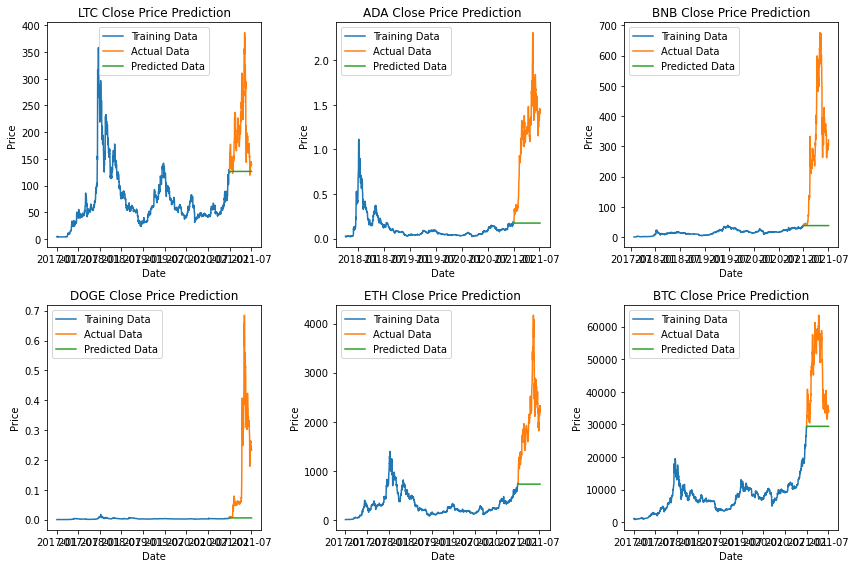

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data from a CSV file
df_Arima = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Create a list to store the evaluation metrics for each currency
metrics = []

# Initialize a counter for the subplots
count = 1

# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = df_Arima[df_Arima['Symbol'] == symbol].copy()

    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)

    # Split the data into training and testing sets
    train_data = currency_data[:'2021-01-01']
    test_data = currency_data['2021-01-01':]

    # Fit an ARIMA model to the training data
    model = sm.tsa.ARIMA(train_data['Close'], order=(1, 1, 1))
    results = model.fit()

    # Make predictions on the testing data
    predictions = results.predict(start=test_data.index[0], end=test_data.index[-1])

    # Evaluate the predictions using MAE, RMSE, and MAPE
    mae = mean_absolute_error(test_data['Close'], predictions)
    rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
    mape = np.mean(np.abs((test_data['Close'] - predictions) / test_data['Close'])) * 100

    # Add the evaluation metrics to the list
    metrics.append([symbol, mae, rmse, mape])

    # Add the model to the dictionary
    models[symbol] = results

    # Plot the predicted vs. actual values for the currency
    row = (count - 1) // 3
    col = (count - 1) % 3
    axs[row, col].plot(train_data.index, train_data['Close'], label='Training Data')
    axs[row, col].plot(test_data.index, test_data['Close'], label='Actual Data')
    axs[row, col].plot(test_data.index, predictions, label='Predicted Data')
    axs[row, col].set_title(f'{symbol} Close Price Prediction')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    count += 1

# Print the evaluation metrics for all currencies in a single table
metrics_df = pd.DataFrame(metrics, columns=['Symbol', 'MAE', 'RMSE', 'MAPE'])
print(metrics_df)

# Adjust the spacing between subplots and show the plot
fig.tight_layout()
plt.show()

### **Feature Imporatance**

In [56]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Create a dictionary to store feature importance results
feature_importance = {"High": {}, "Low": {}, "Open": {}, "Volume": {}, "Marketcap": {}}

# Loop through each cryptocurrency
for symbol in df["Symbol"].unique():
    # Subset data for the current cryptocurrency
    subset = df[df["Symbol"] == symbol].reset_index(drop=True)
    
    # Split data into train and test sets
    train_size = int(len(subset) * 0.8)
    train_data = subset[:train_size]
    test_data = subset[train_size:]
    
    # Fit ARIMA model to train data
    arima_model = ARIMA(train_data["Close"], order=(1, 1, 1))
    arima_results = arima_model.fit()
    
    # Get residuals from ARIMA model
    residuals = arima_results.resid
    
    # Train random forest and gradient boosting models on residuals
    rf_model = RandomForestRegressor()
    gb_model = GradientBoostingRegressor()
    rf_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    gb_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    
    # Store feature importance results for the current cryptocurrency
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], rf_model.feature_importances_):
        feature_importance[feature][symbol+"_RF"] = importance
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], gb_model.feature_importances_):
        feature_importance[feature][symbol+"_GB"] = importance

# Convert feature importance dictionary to dataframe
feature_importance_df = pd.DataFrame(feature_importance)

# Print feature importance results
print(feature_importance_df)

             High       Low      Open    Volume  Marketcap
LTC_RF   0.182100  0.135455  0.294276  0.173741   0.214429
LTC_GB   0.219627  0.081210  0.273041  0.164529   0.261594
ADA_RF   0.220908  0.119920  0.314150  0.093131   0.251891
ADA_GB   0.276005  0.065832  0.290977  0.064726   0.302460
BNB_RF   0.145931  0.164044  0.240220  0.247757   0.202048
BNB_GB   0.194411  0.157320  0.292574  0.177869   0.177827
DOGE_RF  0.143933  0.127578  0.375052  0.111248   0.242188
DOGE_GB  0.093049  0.082187  0.501841  0.087922   0.235001
ETH_RF   0.130665  0.150133  0.337391  0.097353   0.284459
ETH_GB   0.076085  0.145024  0.395072  0.072875   0.310944
BTC_RF   0.149556  0.139868  0.341838  0.106241   0.262496
BTC_GB   0.135602  0.154994  0.354557  0.049812   0.305035


### **Time-Series Forecasting -Seasonal Autoregressive Integrated Moving Average (SARIMA)**

In [1]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load the data from a CSV file
df_Sarima = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = df_Sarima[df_Sarima['Symbol'] == symbol].copy()

    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)

    # Fit a SARIMA model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')
    results = model.fit()

    # Add the model to the dictionary
    models[symbol] = results

# Print the summary output for all models in a single window
for symbol, result in models.items():
    print(f"Summary for {symbol}:")
    print(result.summary())
    print("="*60)

Summary for LTC:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1648
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -5777.085
Date:                            Thu, 16 Mar 2023   AIC                          11564.169
Time:                                    15:13:43   BIC                          11591.166
Sample:                                01-01-2017   HQIC                         11574.183
                                     - 07-06-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0011      0.009     -0.128      0.898      -0.019       0.016
ar.L1         -0.7

  Symbol           MAE          RMSE       MAPE
0    LTC     66.101909     86.476922  28.833343
1    ADA      0.969448      1.079734  78.924100
2    BNB    255.290813    311.244184  70.702963
3   DOGE      0.173167      0.241711  83.710045
4    ETH   1271.451237   1429.415290  57.486107
5    BTC  12473.141413  15368.666445  24.477583


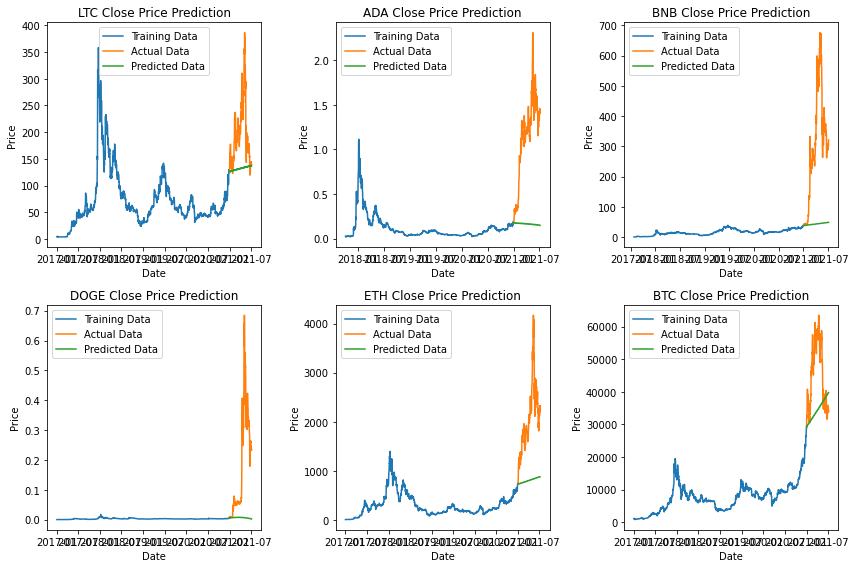

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data from a CSV file
df_Sarima = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Create a list to store the evaluation metrics for each currency
metrics = []

# Initialize a counter for the subplots
count = 1

# Create a figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = df_Sarima[df_Sarima['Symbol'] == symbol].copy()

    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)

    # Split the data into training and testing sets
    train_data = currency_data[:'2021-01-01']
    test_data = currency_data['2021-01-01':]

    # Fit a SARIMA model to the training data
    model = sm.tsa.SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')
    results = model.fit()

    # Make predictions on the testing data
    predictions = results.predict(start=test_data.index[0], end=test_data.index[-1])

    # Evaluate the predictions using MAE, RMSE, and MAPE
    mae = mean_absolute_error(test_data['Close'], predictions)
    rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
    mape = np.mean(np.abs((test_data['Close'] - predictions) / test_data['Close'])) * 100

    # Add the evaluation metrics to the list
    metrics.append([symbol, mae, rmse, mape])

    # Add the model to the dictionary
    models[symbol] = results

    # Plot the predicted vs. actual values for the currency
    row = (count - 1) // 3
    col = (count - 1) % 3
    axs[row, col].plot(train_data.index, train_data['Close'], label='Training Data')
    axs[row, col].plot(test_data.index, test_data['Close'], label='Actual Data')
    axs[row, col].plot(test_data.index, predictions, label='Predicted Data')
    axs[row, col].set_title(f'{symbol} Close Price Prediction')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    count += 1

# Print the evaluation metrics for all currencies in a single table
metrics_df = pd.DataFrame(metrics, columns=['Symbol', 'MAE', 'RMSE', 'MAPE'])
print(metrics_df)

# Adjust the spacing between subplots and show the plot
fig.tight_layout()
plt.show()

In [12]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = data[data['Symbol'] == symbol]
    
    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)
    
    # Fit a SARIMA model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12), trend='c')
    results = model.fit()
    
    # Add the model to the dictionary
    models[symbol] = results

# Create an empty DataFrame for the report
report = pd.DataFrame(columns=['Cryptocurrency', 'SARIMA Model', 'Log-likelihood', 'AIC Value', 'Significant Coefficients', 'Correlation Coefficient', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error'])

# Loop through the models and populate the report DataFrame
for symbol, result in models.items():
    ar_coef = result.params['ar.L1']
    ma_coef = result.params['ma.L1']
    sar_coef = result.params['ar.S.L12']
    sma_coef = result.params['ma.S.L12']
    
    if abs(ar_coef) > 0.1 or abs(ma_coef) > 0.1 or abs(sar_coef) > 0.1 or abs(sma_coef) > 0.1:
        sig_coeffs = 'AR, MA, SAR, and SMA'
    else:
        sig_coeffs = 'None'
    
    # Get the actual and predicted values
    actual = result.resid + result.fittedvalues
    predicted = result.predict(start=1, end=len(actual), dynamic=False)
    
    # Calculate the correlation coefficient
    corr_coef = np.corrcoef(actual, predicted)[0,1]
    
    # Calculate the mean absolute error
    mae = np.mean(np.abs(actual - predicted))
    
    # Calculate the mean squared error
    mse = np.mean((actual - predicted)**2)
    
    # Calculate the root mean squared error
    rmse = np.sqrt(mse)
    
    # Calculate the mean absolute percentage error
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    report = report.append({
        'Cryptocurrency': symbol,
        'SARIMA Model': 'SARIMAX(1,1,1)(1,0,1,12)',
        'Log-likelihood': result.llf,
        'AIC Value': result.aic,
        'Significant Coefficients': sig_coeffs,
        'Correlation Coefficient': corr_coef,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Percentage Error': mape
    }, ignore_index=True)

# Print the report
print(report)


  Cryptocurrency              SARIMA Model  Log-likelihood     AIC Value  \
0            LTC  SARIMAX(1,1,1)(1,0,1,12)    -5777.815445  11567.630889   
1            ADA  SARIMAX(1,1,1)(1,0,1,12)     2510.230294  -5008.460588   
2            BNB  SARIMAX(1,1,1)(1,0,1,12)    -5440.696526  10893.393052   
3           DOGE  SARIMAX(1,1,1)(1,0,1,12)     5014.107704 -10016.215408   
4            ETH  SARIMAX(1,1,1)(1,0,1,12)    -8908.376306  17828.752612   
5            BTC  SARIMAX(1,1,1)(1,0,1,12)   -13304.024299  26620.048598   

  Significant Coefficients  Correlation Coefficient  Mean Absolute Error  \
0     AR, MA, SAR, and SMA                 0.999893             3.873778   
1     AR, MA, SAR, and SMA                 0.999645             0.015031   
2     AR, MA, SAR, and SMA                 0.999731             2.954974   
3     AR, MA, SAR, and SMA                 0.999436             0.002340   
4     AR, MA, SAR, and SMA                 0.999817            22.216465   
5     AR, M

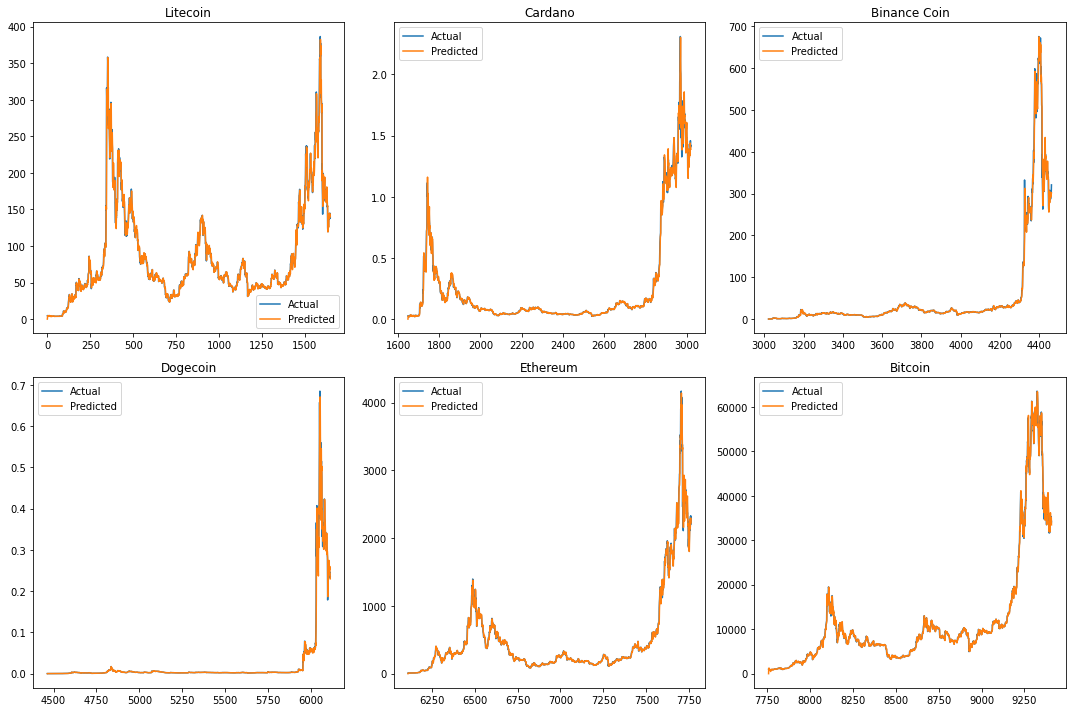

  Cryptocurrency                          Model  Log Likelihood           AIC  \
0       Litecoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -5733.000672  11478.001343   
1        Cardano  SARIMAX(2, 1, 1)(1, 0, 1, 12)     2482.816162  -4953.632323   
2   Binance Coin  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -5384.207394  10780.414789   
3       Dogecoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)     4961.582162  -9911.164323   
4       Ethereum  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -8846.138502  17704.277003   
5        Bitcoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)   -13195.006028  26402.012055   

            BIC     ar.L1     ar.L2     ma.L1  ar.S.L12  ma.S.L12  \
0  11510.390388 -0.777610  0.012926  0.748350  0.601053 -0.711994   
1  -4922.345297 -0.424859  0.138430  0.336157 -0.679719  0.519948   
2  10811.994766  0.244748  0.227471 -0.431803 -0.404084  0.282567   
3  -9878.775279  0.579499  0.121633 -1.453728  0.542910 -0.730959   
4  17736.666048 -0.050391  0.128747 -0.083529 -0.251386  0.134350   
5  26434.401100  0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")


# Load the dataset
data = pd.read_csv('sixcrypto.csv')

# Define a list of cryptocurrencies
cryptos = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Cryptocurrency', 'Model', 'Log Likelihood', 'AIC', 'BIC', 'ar.L1', 'ar.L2', 'ma.L1', 'ar.S.L12', 'ma.S.L12', 'sigma2'])

# Loop over each cryptocurrency and fit a SARIMA model
for i, crypto in enumerate(cryptos):
    # Select the rows corresponding to the current cryptocurrency
    crypto_data = data[data['Name'] == crypto]
    
    # Specify the order of the SARIMA model
    order = (2, 1, 1)
    
    # Specify the seasonal order
    seasonal_order = (1, 0, 1, 12)
    
    # Fit the SARIMA model
    model = SARIMAX(crypto_data['Close'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    
    # Extract the relevant information from the results object
    log_likelihood = results.llf
    aic = results.aic
    bic = results.bic
    ar_l1 = results.params['ar.L1']
    ar_l2 = results.params['ar.L2']
    ma_l1 = results.params['ma.L1']
    ar_s_l12 = results.params['ar.S.L12']
    ma_s_l12 = results.params['ma.S.L12']
    mse = results.mse
    
    # Calculate the MAE, RMSE, MAPE, and correlation coefficient
    predictions = results.predict(start=0, end=len(crypto_data)-1)
    actuals = crypto_data['Close']
    mae = (abs(predictions - actuals)).mean()
    rmse = (((predictions - actuals) ** 2).mean()) ** 0.5
    mape = ((abs(predictions - actuals)) / actuals).mean() * 100
    corr = actuals.corr(predictions)
    
    # Add the results to the dataframe
    results_df = results_df.append({
        'Cryptocurrency': crypto,
        'Model': f"SARIMAX{order}{seasonal_order}",
        'Log Likelihood': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'ar.L1': ar_l1,
        'ar.L2': ar_l2,
        'ma.L1': ma_l1,
        'ar.S.L12': ar_s_l12,
        'ma.S.L12': ma_s_l12,
        'sigma2': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Corr': corr
    }, ignore_index=True)
    
    # Plot the SARIMA model
    ax = axs[i//3, i%3]
    ax.plot(crypto_data['Close'], label='Actual')
    ax.plot(predictions, label='Predicted')
    ax.set_title(crypto)
    ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the results dataframe
print(results_df)

In [75]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Create a dictionary to store feature importance results
feature_importance = {"High": {}, "Low": {}, "Open": {}, "Volume": {}, "Marketcap": {}}

# Loop through each cryptocurrency
for symbol in df["Symbol"].unique():
    # Subset data for the current cryptocurrency
    subset = df[df["Symbol"] == symbol].reset_index(drop=True)
    
    # Split data into train and test sets
    train_size = int(len(subset) * 0.8)
    train_data = subset[:train_size]
    test_data = subset[train_size:]
    
    # Fit SARIMA model to train data
    sarima_model = SARIMAX(train_data["Close"], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
    sarima_results = sarima_model.fit()
    
    # Get residuals from SARIMA model
    residuals = sarima_results.resid
    
    # Train random forest and gradient boosting models on residuals
    rf_model = RandomForestRegressor()
    gb_model = GradientBoostingRegressor()
    rf_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    gb_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    
    # Store feature importance results for the current cryptocurrency
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], rf_model.feature_importances_):
        feature_importance[feature][symbol+"_RF"] = importance
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], gb_model.feature_importances_):
        feature_importance[feature][symbol+"_GB"] = importance

# Convert feature importance dictionary to dataframe
feature_importance_df = pd.DataFrame(feature_importance)

# Print feature importance results
print(feature_importance_df)

             High       Low      Open    Volume  Marketcap
LTC_RF   0.184633  0.144769  0.285616  0.182195   0.202788
LTC_GB   0.199999  0.104926  0.242248  0.171410   0.281418
ADA_RF   0.203873  0.117481  0.307461  0.099730   0.271455
ADA_GB   0.237779  0.046682  0.294492  0.092449   0.328599
BNB_RF   0.149705  0.153088  0.244365  0.235334   0.217508
BNB_GB   0.186874  0.153260  0.301195  0.155807   0.202864
DOGE_RF  0.154459  0.130362  0.347475  0.127019   0.240685
DOGE_GB  0.105147  0.072227  0.475163  0.098445   0.249017
ETH_RF   0.133098  0.163059  0.326821  0.099059   0.277963
ETH_GB   0.100075  0.083149  0.453206  0.065926   0.297644
BTC_RF   0.146766  0.133232  0.336397  0.107310   0.276295
BTC_GB   0.111089  0.124863  0.424170  0.052826   0.287053
